In [1]:
library(anndata)
library(Signac)
library(Seurat)
library(ggplot2)
library(tidyverse)
library(stringr)

Warning message:
“package ‘Signac’ was built under R version 4.2.3”
Signac built for for SeuratObject v4 was just loaded with SeuratObject
v5; disabling v5 assays and validation routines, and ensuring assays
work in strict v3/v4 compatibility mode

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under 

In [2]:
seurat <- readRDS("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/seurat_endocrine_with_links_long_range.rds")

In [3]:
cols <- c( 'Prlf. Ductal'='#f7b6d2', 'Ductal'='#d62728', 'Imm. Acinar'='#ffeb3b', 'Mat. Acinar'='#98df8a',
    'Alpha'='#1f77b4', 'Beta'='#ff7f0e', 'Delta'='#279e68', 'Eps. progenitors'='#aa40fc', 'Epsilon'='#8c564b',
       'Fev+'='#e377c2', 'Fev+ Alpha'='#b5bd61', 'Fev+ Beta'='#aec7e8', 'Fev+ Delta'='#aec7e8', 'Fev+ Delta,0'='#ffbb78', 'Fev+ Delta,1'='#98df8a',
        'Fev+ Delta,2'='#17becf', 'Ngn3 high cycling'='#aec7e8',
        'Ngn3 high,0'='#ff9896', 'Ngn3 high'='#ff9896', 'Ngn3 high,1'='#f0b98d', 'Ngn3 low'='#c5b0d5')

In [5]:
Idents(seurat) <- seurat@meta.data$cell_type_refined

In [6]:
endocrine_cell_types_red <- c(
    "Eps. progenitors",
    "Fev+ Delta,0",
    "Fev+ Delta,1",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
)

In [7]:
Idents(seurat) <- factor(Idents(seurat), levels = endocrine_cell_types_red)

In [8]:
seurat <- subset(x=seurat, idents= endocrine_cell_types_red)

In [9]:
markers_eps_prog <- read.csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/marker_peak_analysis/diff_peaks_signac_eps_prog.csv")

In [10]:
range <- markers_eps_prog$X[[1]]

In [11]:
head(markers_eps_prog,1)

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10-64082075-64082998,1.401739e-57,2.522265,0.205,0.037,3.52784e-52


In [12]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 68 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


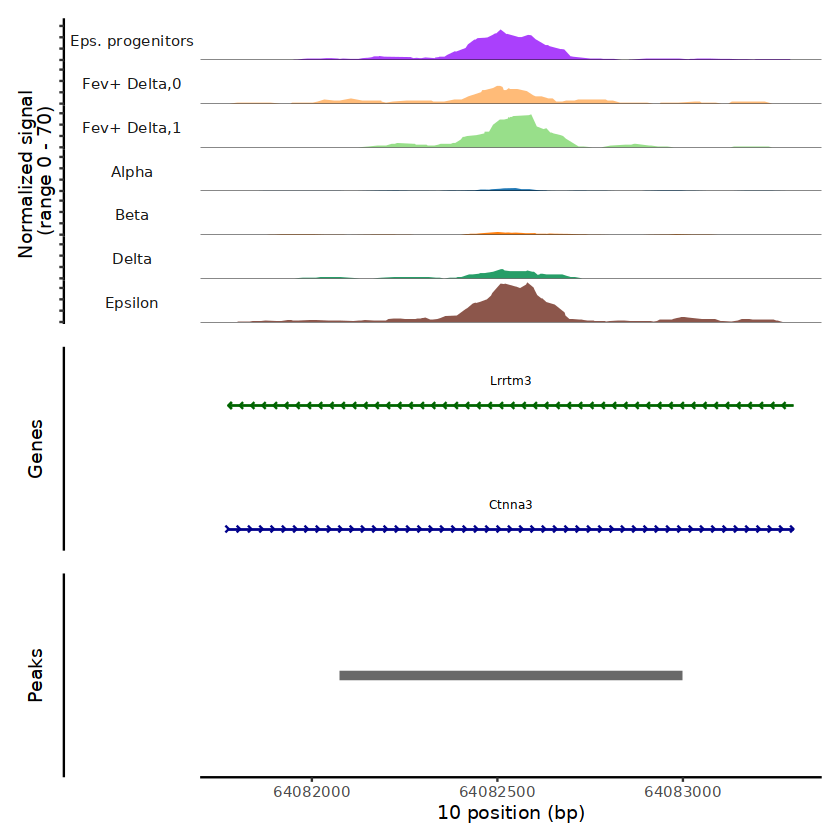

In [13]:
p & scale_fill_manual(values=cols)

In [14]:
ClosestFeature(seurat, range)

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
ENSMUST00000131945,ENSMUST00000131945,Lrrtm3,ENSMUSG00000042846,protein_coding,gap,10-63930268-64090110,10-64082075-64082998,0
